In [ ]:
import random as rd

Variant = 20
rd.seed(Variant)

Numbers_of_problems = [rd.sample(range(5),1)[0]+1, rd.sample(range(5),1)[0]+1, rd.sample(range(5),1)[0]+1]
Numbers_of_problems

[2, 3, 1]

# file.asm



```
;Function exit
exit:
    mov rax,1
    mov rbx,0
    int 0x80

;The function finds the length of a string
;input rax - place of memory of begin string
;output rax - length of the string
len_str:
  push rdx
  mov rdx, rax
  .iter:
      cmp byte [rax], 0
      je .next
      inc rax
      jmp .iter
  .next:
     sub rax, rdx
     pop rdx
     ret


;The function makes new line
; rdi - descriptor
new_line:
   push rax
   push rdi
   push rsi
   push rdx
   push rcx
   mov rax, 0xA
   push rax
   mov rsi, rsp
   mov rdx, 1
   mov rax, 1
   syscall
   pop rax
   pop rcx
   pop rdx
   pop rsi
   pop rdi
   pop rax
   ret

;The function prints minus
; rdi - descriptor
print_minus:
   push rax
   push rdi
   push rsi
   push rdx
   push rcx
   mov rax, '-'
   push rax
   mov rsi, rsp
   mov rdx, 1
   mov rax, 1
   syscall
   pop rax
   pop rcx
   pop rdx
   pop rsi
   pop rdi
   pop rax
   ret

;Function converting the string to the number
;input rsi - place of memory of begin string
;output rax - the number from the string
str_number:
    push r8
    push rcx
    push rbx
    xor rax, rax
    xor rcx,rcx
    xor r8, r8
    cmp byte [rsi], '-'
    jne     .loop
    mov     r8, 1
    inc     rcx
    .loop:
        xor     rbx, rbx
        mov     bl, byte [rsi+rcx]
        cmp     bl, 48
        jl      .finished
        cmp     bl, 57
        jg      .finished

        sub     bl, 48
        add     rax, rbx
        mov     rbx, 10
        mul     rbx
        inc     rcx
        jmp     .loop

    .finished:
        cmp     rcx, 0
        je .restore
        mov     rbx, 10
        div     rbx
    
    .restore:
        pop rbx
        pop rcx
        cmp r8, 1
        jne .end
        neg rax
    .end:
    pop r8
    ret

;Function printing of string
;input rsi - place of memory of begin string
; rdi - descriptor
print_str:
    push rax
    push rdi
    push rdx
    push rcx
    push rbx
    mov rax, rsi
    call len_str
    mov rdx, rax
    mov rax, 1
    syscall
    pop rbx
    pop rcx
    pop rdx
    pop rdi
    pop rax
    ret

;Function printing of char
;input rax - char
; rdi - descriptor
print_char:
    push rdi
    push rsi
    push rdx
    push rcx
    push rbx
    push rax
    mov rsi, rsp
    mov rdx, 1
    mov rax, 1
    syscall
    pop rax
    pop rbx
    pop rcx
    pop rdx
    pop rsi
    pop rdi
    ret

;Function printing of number
;input rax - place of memory of number
; rdi - descriptor
print_num:
    push rsi
    push rdi
    push rdx
    push rcx
    push rbx
    push rax
    cmp rax, 0
    jnl @f
    call print_minus
    neg rax
    @@:
    xor rbx, rbx
    mov rbx, 10
    xor rcx, rcx
    .div_loop:
        xor rdx, rdx
        div rbx
        add rdx, '0'
        push rdx
        inc rcx
        cmp rax, 0
        jne .div_loop
    .print_loop:
        xor rax, rax
        pop rax
        call print_char
        dec rcx
        cmp rcx, 0
        jne .print_loop
    pop rax
    pop rbx
    pop rcx
    pop rdx
    pop rdi
    pop rsi
    ret

;Function reading of string
;input rsi - place of memory to place string, rdx - length
; rdi - descriptor
;output rsi - string
read:
    push rax
    push rdi
    push rdx
    push rcx
    push rbx
    mov rax, 0
    syscall
    pop rbx
    pop rcx
    pop rdx
    pop rdi
    pop rax
    ret

;Function reading of string from file
;input rsi - place of memory to place string,
; rdi - descriptor
;output rsi - string, rax - length
readline:
    push rdx
    push rcx
    push rbx

    xor rcx, rcx
    xor rbx, rbx
    .loop:
        push rcx
        mov rax, 0
        mov rdx, 1
        syscall
        pop rcx
        cmp rax, 0
        je .end
        cmp byte[rsi], 0xA
        je .end
        cmp byte[rsi], 0
        je .end
        inc rsi
        inc rcx
        jmp .loop
    .end:
    mov byte[rsi], 0
    sub rsi, rcx
    mov rax, rcx
    
    pop rbx
    pop rcx
    pop rdx
    ret

;multiplication for 2 operands
macro mul2 op1, op2
{
    push rax
    push rbx
    mov rax, op1
    mov rbx, op2
    mul rbx
    mov op1, rax
    pop rbx
    pop rax
}

```



# 1
2. Список всех выполняемых процессов переписать в файл Task_1. Создать в каталоге **sandbox** каталог **sandbox-2**, переместить туда файлы **Task_2, Task_3**. Переписать содержимое файла **/bin/ls** в файл **Task_2**, переименовав его в "**myls**", установить права доступа на файл "**myls**" - "**r-xr--r--**". Добавить в файл **Task_3** информацию о ядре системы.


```
ps uax > Task_1
mkdir sandbox-2
mv Task_2 sandbox-2
mv Task_3 sandbox-2
cp /bin/ls Task_2
mv Task_2 myls
chmod 544 myls
uname -a > Task_3
```



# 2
3. Разработать программу на языке ассемблера, которая принимает в качестве параметра командной строки значение $n$, выполняет расчет указанного выражения и выводит результат на экран:
$$1+2+\ldots+11+21+31+\ldots+91+2+12+\ldots$$
Т.е. суммируются реверсированные числа от 1 до $n$.




```
format ELF64

include 'file.asm'

public _start
public reverse

section '.text' executable
_start:
    mov rsi, [rsp+16]
    call str_number
    mov r8, rax
    cmp r8, 1
    jl .finish
    xor r9, r9
    .sum_loop:
        cmp r8, 0
        je @f
        mov rax, r8
        call reverse
        add r9, rax
        dec r8
        jmp .sum_loop
    
    @@:
    mov rax, r9
    mov rdi, 1
    call print_num
    call new_line
    .finish:
        call exit

        

; input: rax - number
; output: rax - reversed number
reverse:
    mov rbx, 10
    xor rcx, rcx
    .div_loop:
        cmp rax, 0
        je .end
        mul2 rcx, rbx
        xor rdx, rdx
        div rbx
        add rcx, rdx
        jmp .div_loop
    .end:
    mov rax, rcx
    ret


```



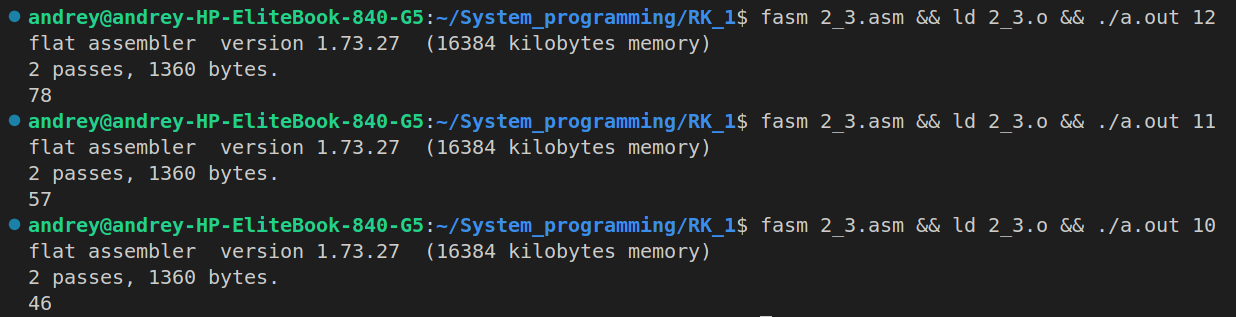

# 3
1. Написать программу на языке ассемблера, которая принимает два параметра командной строки: первый -  имя некоторого каталога, второй - некоторое число $n$. Программа заходит в данный каталог и создает $n$ файлов со случайным названием.



```
format ELF64

include 'file.asm'

public _start

section '.bss' writable
    buffer rq 1
    filename: times 10 db ?
    path: times 100 db ?
    f db "/dev/random", 0

section '.text' executable
_start:
    mov rsi, [rsp+16]
    xor rcx, rcx
    xor rbx, rbx
    .read_path:
        mov bl, byte[rsi+rcx]
        mov byte[path+rcx], bl
        cmp byte[rsi+rcx], 0
        je @f
        inc rcx
        jmp .read_path
    
    @@:
    mov r9, rcx ; сохранили длину пути
    mov rsi, [rsp+24]
    call str_number
    mov r8, rax
    .loop:
        cmp r8, 0
        je .finish

        mov rsi, filename
        mov rax, 9
        call random_str

        mov byte[path+r9], "/"
        inc r9
        xor rcx, rcx
        xor rbx, rbx
        .fill_path:
            mov bl, byte[rsi+rcx]
            mov byte[path+rcx+r9], bl
            cmp byte[rsi+rcx], 0
            je @f
            inc rcx
            jmp .fill_path

        @@:
        mov rax, 0x55
        mov rdi, path
        mov rsi, 777o
        syscall

        dec r8
        jmp .loop

    .finish:
        call exit


;input: rsi - place of memory to place string, rax - length
;output rsi - string, rax - length
random_str:
    push r8
    push r9
    push r10    
    push rdx
    push rcx
    push rbx
    push rax

    mov r9, rax

    push rsi
    mov rdi, f
    mov rax, 2
    mov rsi, 0o
    syscall
    mov r8, rax
    pop rsi

    mov bl, 26
    mov bh, 97
    xor rdx, rdx
    .loop:
        cmp rdx, r9
        je .end
        push rdx
        push rsi
        mov rax, 0
        mov rdi, r8
        mov rsi, buffer
        mov rdx, 1
        syscall
        pop rsi

        mov rax, [buffer]
        div bl
        add ah, bh
        pop rdx
        mov byte[rsi+rdx], ah
        inc rdx
        jmp .loop
    
    .end:
    mov byte[rsi+rdx], 0

    pop rax
    pop rbx
    pop rcx
    pop rdx
    pop r10
    pop r9
    pop r8
    ret
```



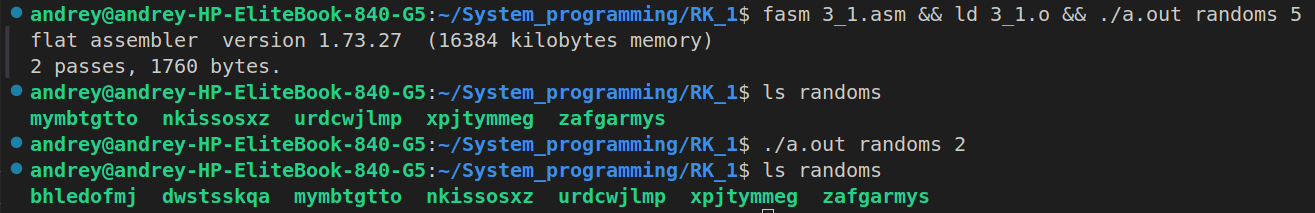